# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # so graphs can have .2f format

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [5]:
data.isna().sum()
print(f"Any NAN value? {data.isna().values.any()}")
print(f"Number of NAN values:\n{data.isna().sum()}")

Any NAN value? False
Number of NAN values:
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64


In [6]:
print(f"Any duplicates? {data.duplicated().values.any()}")
print(f"Number of duplicates: {data.duplicated().sum()}")

Any duplicates? False
Number of duplicates: 0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [8]:
column_list = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
to_replace = ['$', ',']

# remove '$' and ',' signs
for column in column_list:
    for character in to_replace:
        data[column] = data[column].str.replace(character, '')

C:\Users\pavli\AppData\Local\Temp\ipykernel_75140\2012918569.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = data[column].str.replace(character, '')


In [9]:
# convert data in columns to numeric
for column in column_list:
    data[column] = pd.to_numeric(data[column])

In [10]:
type(data.USD_Production_Budget[0])

numpy.int64

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [11]:
data.Release_Date = pd.to_datetime(data.Release_Date, format='%m/%d/%Y')
print(type(data.Release_Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
# check data after conversions
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [13]:
# confirm new data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [14]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [15]:
print("Film with the lowest budget in dataset is...")
data.sort_values('USD_Production_Budget').head(1)

Film with the lowest budget in dataset is...


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [16]:
print("Film with the highest budget in dataset is...")
data.sort_values('USD_Production_Budget', ascending=False).head(1)

Film with the highest budget in dataset is...


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [17]:
print(f"Number of films grossed $0 domestically: {(data.USD_Domestic_Gross == 0).sum()}")
data[data.USD_Domestic_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)

Number of films grossed $0 domestically: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [18]:
print(f"Number of films grossed $0 worldwide: {(data.USD_Worldwide_Gross == 0).sum()}")
data[data.USD_Worldwide_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False).head()

Number of films grossed $0 worldwide: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [19]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [20]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0').head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [21]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [22]:
future_releases = data[data.Release_Date >= scrape_date]
print(f"Number of unreleased movies: {len(future_releases)}")
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [23]:
# drop future releases
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [24]:
print(f"{(len(data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')) / len(data_clean))*100:.2f}%")

37.28%


# Seaborn for Data Viz: Bubble Charts

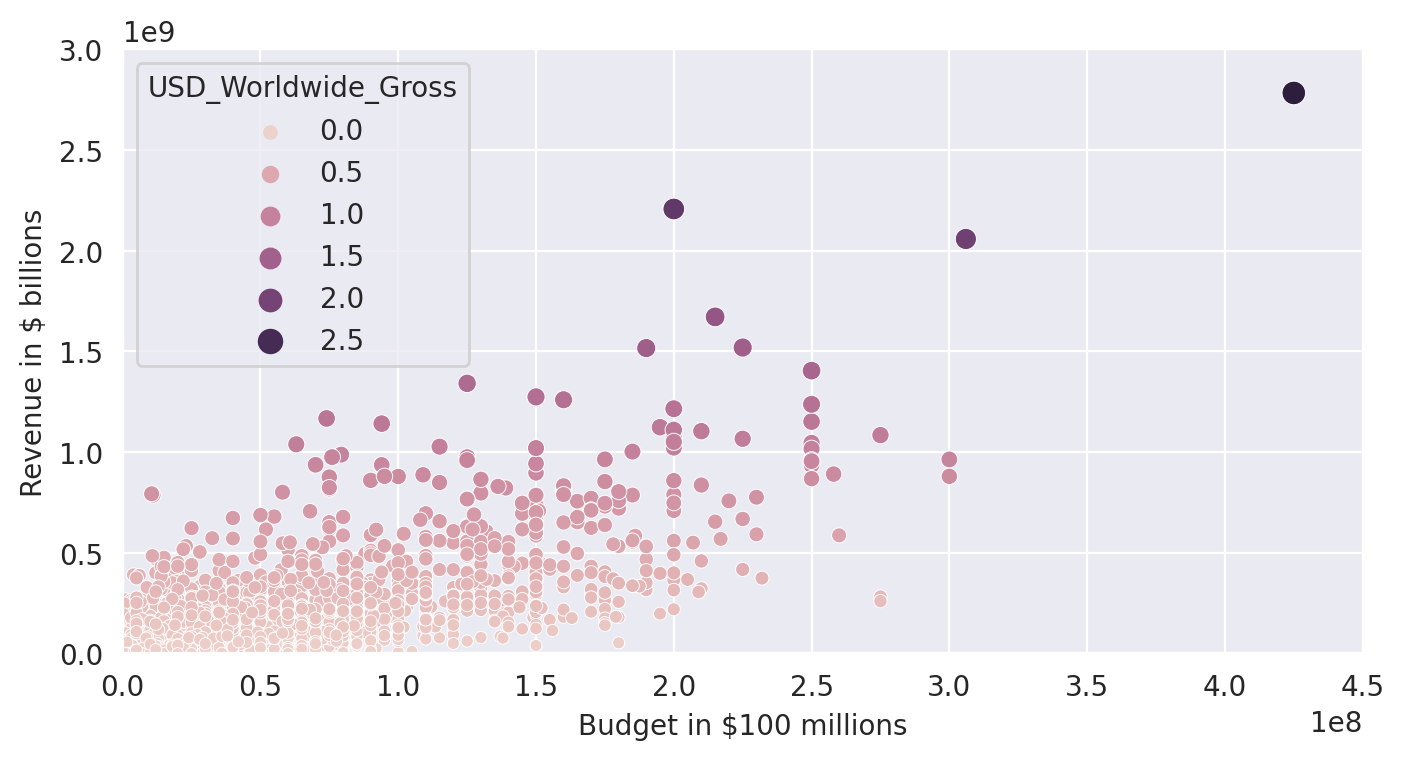

In [25]:
# since seaborn is built on top of matplotlib we can dive into the matplotlib layer anytime to configure charts

plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, 
                         x='USD_Production_Budget', 
                         y='USD_Worldwide_Gross', 
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')
 
    ax.set(ylim=(0, 3000000000), 
           xlim=(0, 450000000), 
           ylabel='Revenue in $ billions', 
           xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<!-- <img src=https://i.imgur.com/8fUn9T6.png> -->



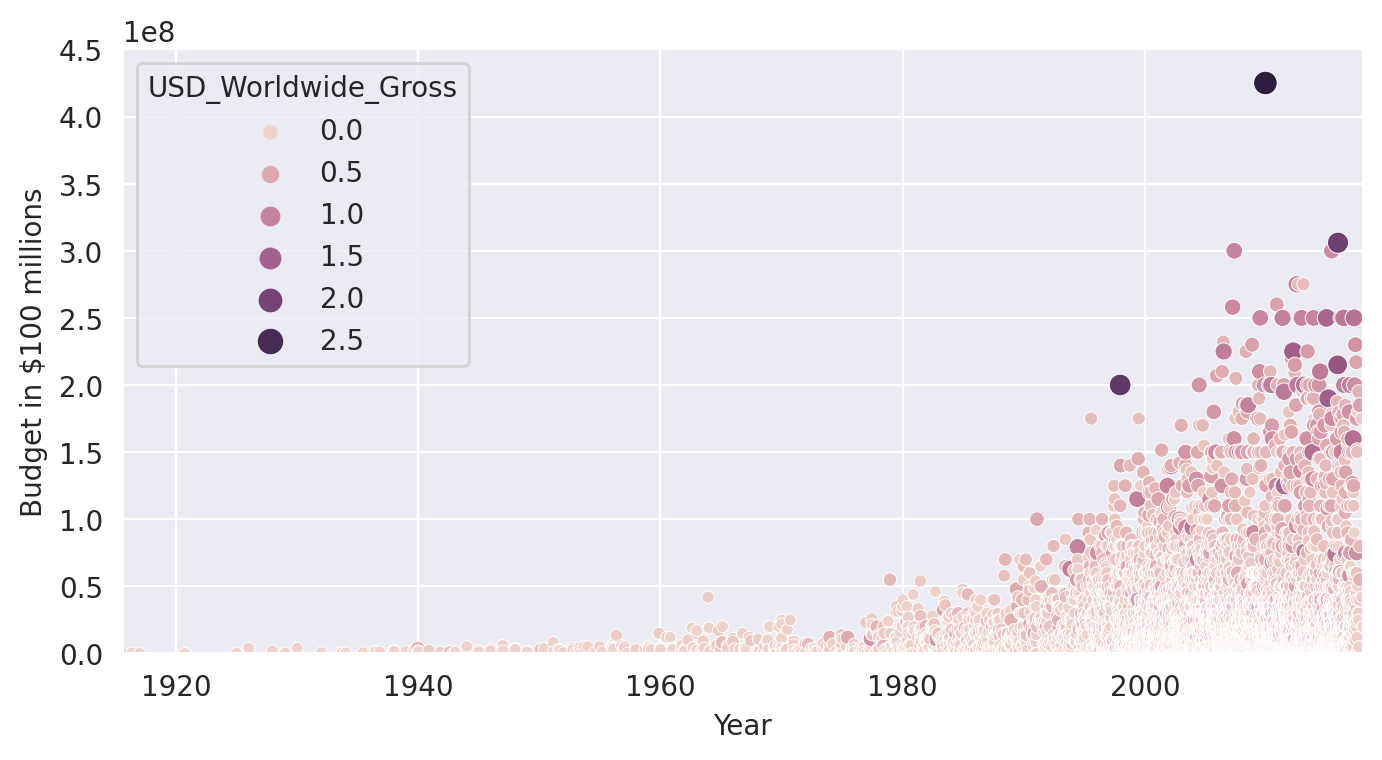

In [26]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [27]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

In [28]:
decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [31]:
old_films = data_clean[data_clean.Decade < 1970]
old_films.sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


In [30]:
new_films = data_clean[data_clean.Decade >= 1970]
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


# Seaborn Regression Plots

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

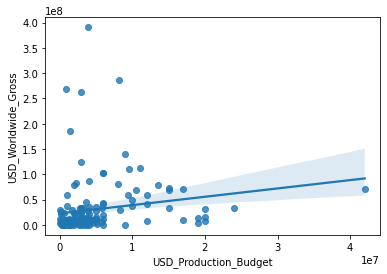

In [33]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

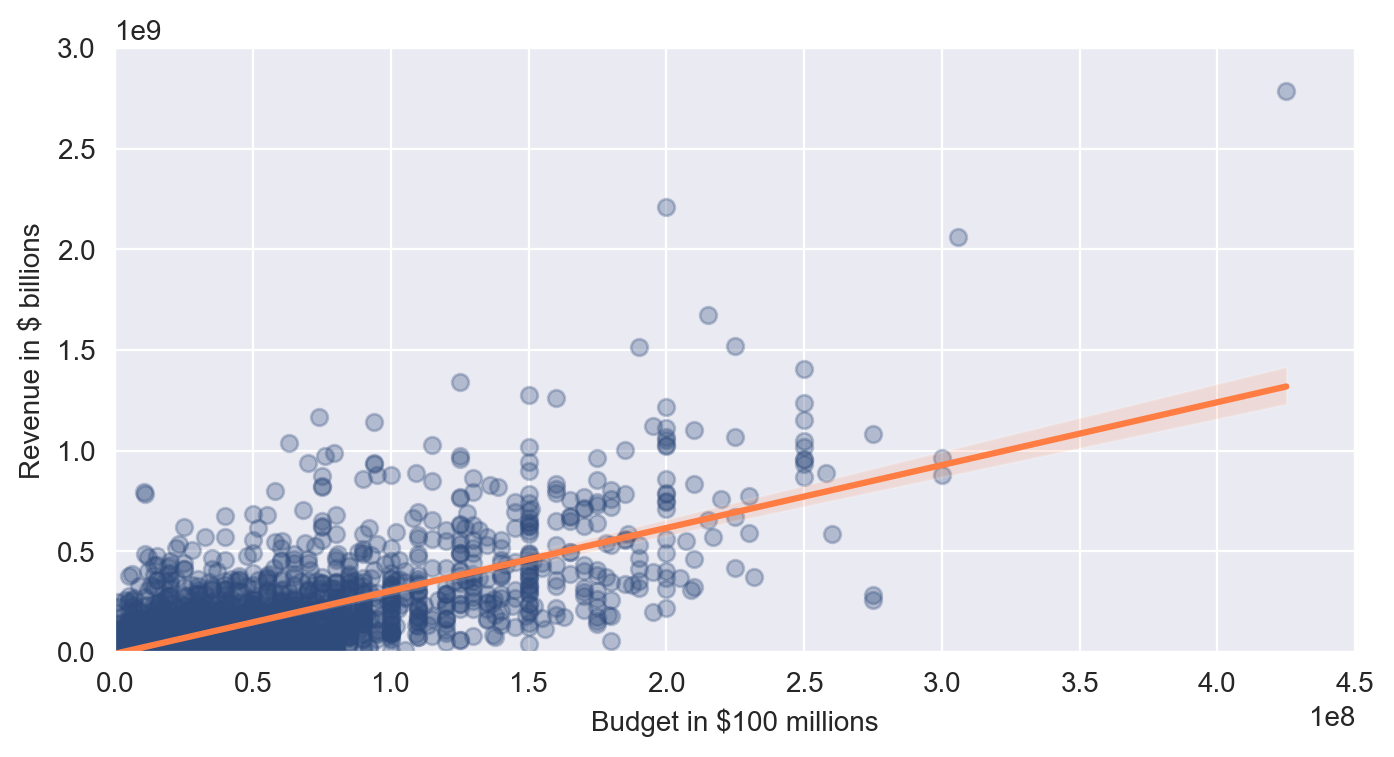

In [40]:
plt.figure(figsize=(8,4), dpi=200)
sns.set_style("darkgrid")
ax = sns.regplot(data=new_films,
                 x='USD_Production_Budget',
                 y='USD_Worldwide_Gross',
                 color='#2f4b7c',
                 scatter_kws = {'alpha': 0.3},
                 line_kws = {'color': '#ff7c43'})

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [44]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

LinearRegression()

That's it. Now we can look at the values of theta-one and theta-zero from the equation above. 

In [45]:
# Theta zero
regression.intercept_

array([-8650768.00661024])

In [46]:
# Theta one
regression.coef_

array([[3.12259592]])

Both intercept_ and coef_ are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is $0, the estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

In [47]:
# R-squared
regression.score(X, y)

0.5577032617720403

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [48]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [53]:
print(f"Theta zero (intercept): {regression.intercept_[0]}")
print(f"Theta one (slope): {regression.coef_[0][0]}")
print(f"R-squared: {regression.score(X, y)}")

Theta zero (intercept): 22821538.635080386
Theta one (slope): 1.6477131440107313
R-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [63]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350M film is around ${revenue_estimate:,.2f}')

The estimated revenue for a $350M film is around $600,000,000.00


### In this lesson we looked at how to:

-Use nested loops to remove unwanted characters from multiple columns

-Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

-Create bubble charts using the Seaborn Library

-Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

-Use floor division (i.e., integer division) to convert years to decades

-Use Seaborn to superimpose a linear regressions over our data

-Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

-Run regressions with scikit-learn and calculate the coefficients.